## Large Modeling featuring topic modeling, vader sentiment, closing price, and  Loughran-McDonald sentimnent

In [1]:
# Author: bbaasan
# File: large_modeling.ipynb
# Created: 2023-09-18
# Email: bbaasan@gmu.edu
# Purpose: Final modeling with various features

In [1]:
import pandas as pd

## Valence Aware Diotionary and sEntiment Reasoners (VADER)  
is a lexicon and rule-based sentiment analysis tool that is *purposefully tuned to sentiment ana;ysis expressed in social media*. In the context of VADER, 'valence' refers to the emotional polarity or sentiment associated with a piece of text. Polarity refers to overall emotional tone or sentiment expressed in the text. 
Source: [github](https://github.com/cjhutto/vaderSentiment) and [python library](https://pypi.org/project/vaderSentiment/) and [original paper](https://ojs.aaai.org/index.php/ICWSM/article/view/14550)

In [2]:
# vader scores
vader = pd.read_pickle('../data/SentimentVader/vader_sentiment.pkl')

## Loughran-McDonald Sentiment  

is a baseline dictionary and is oriented towards common words. It is extended to include words appearing in 10-K documents and earnings calls that are not found in the original 2of12inf word list by examining tokens from all 10-K type filings for the full EDGAR 10-K archive and earnings call from CAPIQ. The dictionary reports counts, proportion of total, average proportion per document, standard deviation of proportion per document, document count, and seven category identifiers, number of syllables and source of each word [Master Dictionary](https://sraf.nd.edu/loughranmcdonald-master-dictionary/)

In [3]:
# loughran-mcdonald sentiment scores
lm_sent = pd.read_pickle('../data/LoughranMcDonald/earnings_sentiment.pkl')

In [4]:
# data
aggregate = pd.read_pickle('../data/Aggregated.pkl')#[['close', 'sma50_close', 'sma200_close','target']]
aggregate = aggregate.reset_index(drop=True)

In [5]:
# topic modeling
large_topics = pd.read_pickle('../data/large_topics_proportions_df.pkl')

In [6]:
# matrix table
big_table = pd.concat([aggregate,large_topics,lm_sent,vader],axis=1)


In [8]:
X = big_table.drop('target', axis=1)
labels = big_table['target']

In [9]:
X

,close,sma50_close,sma200_close,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,LM_Positive,LM_Negative,LM_Uncertainty,neg,neu,pos
0,1.100000,1.154400,1.672250,0.000296,0.425715,0.000296,0.218205,0.000296,0.000296,0.000296,0.000296,0.354008,0.000296,20,20,4,0.040,0.813,0.146
1,16.000000,14.278522,11.600599,0.167129,0.000160,0.000161,0.136694,0.000160,0.000160,0.000160,0.000160,0.690556,0.004658,53,35,13,0.021,0.800,0.179
2,-28.342836,-26.778371,-25.616853,0.350938,0.000120,0.000120,0.183133,0.000120,0.000120,0.000120,0.000120,0.030443,0.434765,56,29,19,0.011,0.802,0.186
3,10.830000,10.796200,9.320700,0.754833,0.000149,0.000149,0.000149,0.000149,0.003629,0.029885,0.201745,0.009163,0.000149,28,95,6,0.027,0.832,0.141
4,38.812000,40.800520,45.000936,0.696909,0.000095,0.000095,0.000095,0.000095,0.270060,0.012861,0.019600,0.000095,0.000095,56,61,42,0.025,0.828,0.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136517,51.318615,57.036444,58.085233,0.000108,0.000108,0.000108,0.000108,0.000108,0.134308,0.000108,0.031809,0.822942,0.010296,87,52,23,0.023,0.832,0.145
136518,61.500000,63.793400,69.368850,0.257853,0.000096,0.000096,0.015348,0.000096,0.600495,0.057191,0.000096,0.000096,0.068632,60,60,26,0.026,0.791,0.184
136519,235.513428,238.028843,237.354383,0.000090,0.526406,0.000090,0.000090,0.006015,0.000090,0.000090,0.000090,0.417274,0.049763,51,34,44,0.027,0.823,0.150
136520,48.833820,47.849117,43.219273,0.138489,0.000099,0.020017,0.284387,0.000099,0.000099,0.011366,0.021472,0.030229,0.493743,35,46,15,0.021,0.824,0.154


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [11]:
# data spllt
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


## Random Forest Classifier

In [12]:

rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the pipeline on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_classifier.predict(X_test)

# Generate a classification report
rf_report = classification_report(y_test, rf_y_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     12333
           1       0.87      0.94      0.90     14972

    accuracy                           0.89     27305
   macro avg       0.90      0.89      0.89     27305
weighted avg       0.89      0.89      0.89     27305



In [13]:
# Feature importance (for tree-based models)
feature_importance = rf_classifier.feature_importances_
print(feature_importance)

[0.12809586 0.1545447  0.25205158 0.03110456 0.0292478  0.0313846
 0.02963014 0.02800708 0.02947115 0.03077322 0.02968503 0.03263229
 0.03131954 0.02670054 0.02854832 0.02527822 0.02887399 0.02569272
 0.02695868]


In [14]:
X.columns

Index(['close', 'sma50_close', 'sma200_close', 'Topic_1', 'Topic_2', 'Topic_3',
       'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9',
       'Topic_10', 'LM_Positive', 'LM_Negative', 'LM_Uncertainty', 'neg',
       'neu', 'pos'],
      dtype='object')

#### Permutation importance

In [16]:
from sklearn.inspection import permutation_importance

# Compute permutation importances
#perm_importance = permutation_importance(rf_classifier, X, labels)
#feature_importance__ = perm_importance.importances_mean
#print(f'Feature Permutation Importance: {feature_importance__}')

In [ ]:
'''
feature_df = pd.DataFrame({
    'feature_name':['close', 'sma50_close', 'sma200_close', 'Topic_1', 'Topic_2', 'Topic_3',
                'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9',
                'Topic_10', 'LM_Positive', 'LM_Negative', 'LM_Uncertainty', 'neg',
                'neu', 'pos'],
    'feature_important':feature_importance,
    'feature_permutations':feature_importance__
})
#feature_df.to_pickle('../data/rf_features_analysis.pkl')'''

In [6]:
import pandas as pd
from tabulate import tabulate
from matplotlib import pyplot as plt 

feature_table = pd.read_pickle('../data/rf_features_analysis.pkl')
feature_table

,feature_name,feature_important,feature_permutations
0,close,0.126966,0.352491
1,sma50_close,0.156690,0.432426
2,sma200_close,0.246872,0.389424
3,Topic_1,0.031526,0.001979
4,Topic_2,0.029851,0.001301
5,Topic_3,0.031380,0.000514
6,Topic_4,0.029644,0.001015
7,Topic_5,0.028334,0.000757
8,Topic_6,0.029825,0.000214
9,Topic_7,0.030499,0.000302


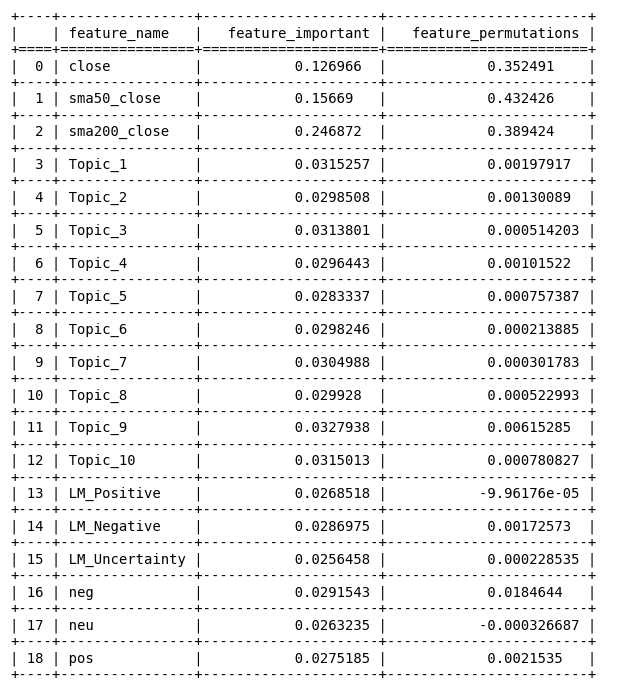

In [18]:
# Convert DataFrame to a tabulated format and print
table_tail = tabulate(feature_table, headers='keys', tablefmt='grid')


# Create a matplotlib figure and add the tabulated text as an annotation
fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0, 1, table_tail, va='top', fontfamily='monospace', fontsize=10, transform=ax.transAxes)
ax.axis('off')  # Turn off axes

# Save the figure as an image file (e.g., PNG)
fig.savefig('../docs/results/feature_analysis.png', pad_inches=0.1, bbox_inches='tight', dpi=200)

## Logsitic Regression Classifier

In [17]:
from sklearn.linear_model import LogisticRegression

# create an instance in Logistic Regression
log_regress_classifier = LogisticRegression(max_iter=1000, random_state=42)

# fit the model
log_regress_classifier.fit(X_train, y_train)

# make predictions on the test data
log_y_pred = log_regress_classifier.predict(X_test)

# print report
log_report = classification_report(y_test, log_y_pred)
print(log_report)

              precision    recall  f1-score   support

           0       0.45      1.00      0.62     12333
           1       0.00      0.00      0.00     14972

    accuracy                           0.45     27305
   macro avg       0.23      0.50      0.31     27305
weighted avg       0.20      0.45      0.28     27305



c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and

## Gaussian Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Multinomial Naive Bayes classifier
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

# Make predictions
gnb_y_pred = gnb_classifier.predict(X_test)

gnb_report = classification_report(y_test, gnb_y_pred)

print("Classification Report:\n", gnb_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62     12333
           1       0.67      0.00      0.00     14972

    accuracy                           0.45     27305
   macro avg       0.56      0.50      0.31     27305
weighted avg       0.57      0.45      0.28     27305



## Support Vector

In [19]:
# Import necessary libraries
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_report = classification_report(y_test, svm_predictions)

# Print accuracy for each classifier
print(f"SVM Accuracy: {svm_report}")

SVM Accuracy:               precision    recall  f1-score   support

           0       0.99      1.00      1.00     12333
           1       1.00      1.00      1.00     14972

    accuracy                           1.00     27305
   macro avg       1.00      1.00      1.00     27305
weighted avg       1.00      1.00      1.00     27305



## Gradient Boosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = classification_report(y_test, gb_predictions)

In [22]:
print(gb_accuracy)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     12333
           1       0.86      0.95      0.90     14972

    accuracy                           0.88     27305
   macro avg       0.89      0.88      0.88     27305
weighted avg       0.89      0.88      0.88     27305



## K-Neighbor Classifier  
- keeps raising error message 

## Neural Network  

In [23]:
from sklearn.neural_network import MLPClassifier

# Neural Networks (using TensorFlow/Keras)
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
nn_model = keras.Sequential([
    layers.Input(shape=X_train.shape[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model
nn_predictions = nn_model.predict(X_test)
nn_predictions = (nn_predictions > 0.5).astype(int)  # Convert probabilities to binary labels (e.g., 0 or 1)

# Calculate and print the classification report
nn_classification_report = classification_report(y_test, nn_predictions)
print("Neural Network Classification Report:")
print(nn_classification_report)


854/854 [==============================] - 1s 533us/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12333
           1       0.99      0.97      0.98     14972

    accuracy                           0.98     27305
   macro avg       0.98      0.98      0.98     27305
weighted avg       0.98      0.98      0.98     27305



In [ ]:
for each_threshold in [.4,.5,.6]:
    # Evaluate the model
    nn_predictions = nn_model.predict(X_test)
    nn_predictions = (nn_predictions > 0.5).astype(int)  # Convert probabilities to binary labels (e.g., 0 or 1)

    # Calculate and print the classification report
    nn_classification_report = classification_report(y_test, nn_predictions)
    print(f"Neural Network Classification Report: {each_threshold}")
    print(nn_classification_report, '\n\n')

854/854 [==============================] - 0s 544us/step
Neural Network Classification Report: 0.4
              precision    recall  f1-score   support

           0       0.45      1.00      0.62     12333
           1       0.00      0.00      0.00     14972

    accuracy                           0.45     27305
   macro avg       0.23      0.50      0.31     27305
weighted avg       0.20      0.45      0.28     27305
 


164/854 [====>.........................] - ETA: 0s

c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

854/854 [==============================] - 0s 530us/step
Neural Network Classification Report: 0.5
              precision    recall  f1-score   support

           0       0.45      1.00      0.62     12333
           1       0.00      0.00      0.00     14972

    accuracy                           0.45     27305
   macro avg       0.23      0.50      0.31     27305
weighted avg       0.20      0.45      0.28     27305
 


 84/854 [=>............................] - ETA: 0s 

c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

854/854 [==============================] - 0s 545us/step
Neural Network Classification Report: 0.6
              precision    recall  f1-score   support

           0       0.45      1.00      0.62     12333
           1       0.00      0.00      0.00     14972

    accuracy                           0.45     27305
   macro avg       0.23      0.50      0.31     27305
weighted avg       0.20      0.45      0.28     27305
 




c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jrbat\Desktop\Earnings\earnings_venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [ ]:
aggregate.target.value_counts()/aggregate.shape[0]

target
1    0.545026
0    0.454974
Name: count, dtype: float64

## Addressing imbalance  

- Real-World Distribution: If the class imbalance in your dataset accurately reflects the real-world distribution of classes, it might be best not to balance the classes. Changing the class distribution could introduce bias into your model's predictions.  

- Cost-Sensitive Learning: In some cases, you may want to emphasize the minority class because it's more critical or costly to misclassify. In such situations, you may choose not to balance the classes but rather use cost-sensitive learning techniques.

It's not uncommon for certain features to have a more significant impact on the predictions or trends in your data. In your case, the "close price," "50-day average," and "200-day average" features are financial indicators that often play a crucial role in financial and stock market analysis. It's not surprising that these features are among the most important in your dataset, as they directly reflect stock price movements and trends.